In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [18]:
flight_data_2023 = pd.read_csv("fl2023_train.csv")

In [19]:
flight_data_2023.shape

(463464, 32)

In [20]:
# Loại bỏ các cột không cần thiết
flight_data_2023 = flight_data_2023.drop(columns=['AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE', 'ORIGIN_CITY', 'DEST_CITY', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'FL_DATE'])
flight_data_2023 = flight_data_2023.dropna()

In [21]:
# One-hot encoding
categorical_features = ['AIRLINE', 'ORIGIN', 'DEST']
encoder = OneHotEncoder(sparse_output=False)
encoded_features = pd.DataFrame(encoder.fit_transform(flight_data_2023[categorical_features]))
encoded_features.columns = encoder.get_feature_names_out(categorical_features)
encoded_features.index = flight_data_2023.index

In [22]:
# Kết hợp dữ liệu đã mã hóa với các cột khác
data = flight_data_2023.drop(columns=categorical_features)
data = pd.concat([data, encoded_features], axis=1)

In [23]:
# Chuyển tất cả các cột dữ liệu sang kiểu float
data = data.astype(float)

# Chuẩn hóa các cột số
numeric_features = ['CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN',
                    'CRS_ARR_TIME', 'ARR_TIME', 'CRS_ELAPSED_TIME', 'ELAPSED_TIME', 'AIR_TIME',
                    'DISTANCE', 'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY',
                    'DELAY_DUE_LATE_AIRCRAFT']
scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

In [24]:
# Tách dữ liệu thành tập huấn luyện và kiểm tra
X = data.drop(columns=['ARR_DELAY'])
y = data['ARR_DELAY']
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Khởi tạo và huấn luyện mô hình Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = rf.predict(X_test)

In [26]:
# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')

MSE: 20.436897362763368
MAE: 1.4193335244374372


In [27]:
# Lưu mô hình Random Forest vào thư mục đã chỉ định
with open('C:\\pycharm\\Flight-delay-forecast-master\\random_forest\\random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf, f)

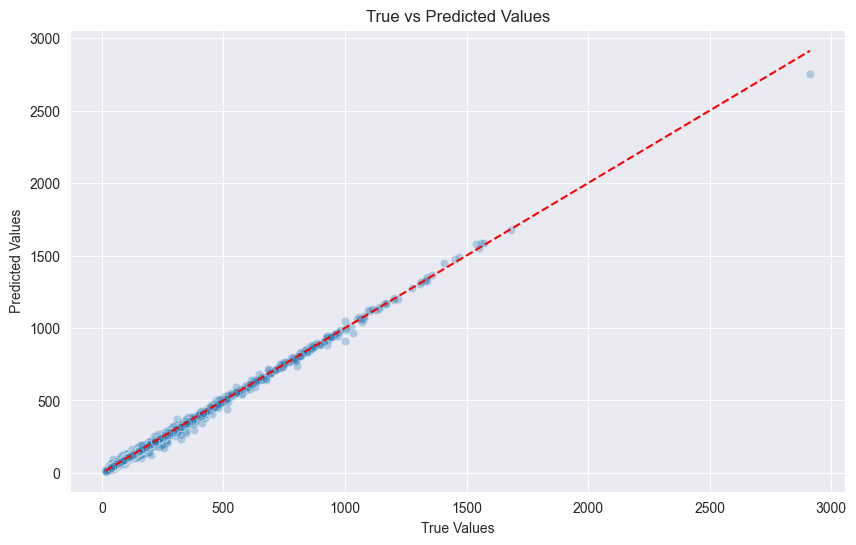

In [28]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()

In [33]:
# Tải dữ liệu kiểm tra từ tệp mới
test_data = pd.read_csv("fl2023_test.csv")

columns_to_drop = ['AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE', 'ORIGIN_CITY', 'DEST_CITY', 
                   'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'FL_DATE']
# Loại bỏ các cột không cần thiết
test_data = test_data.drop(columns=columns_to_drop)
test_data = test_data.dropna()

# One-hot encoding cho các biến phân loại
encoded_test_features = pd.DataFrame(encoder.transform(test_data[categorical_features]))
encoded_test_features.columns = encoder.get_feature_names_out(categorical_features)
encoded_test_features.index = test_data.index

# Kết hợp dữ liệu đã mã hóa với các cột khác
test_data = test_data.drop(columns=categorical_features)
test_data = pd.concat([test_data, encoded_test_features], axis=1)

# Chuyển tất cả các cột dữ liệu sang kiểu float
test_data = test_data.astype(float)

# Chuẩn hóa các cột số
test_data[numeric_features] = scaler.transform(test_data[numeric_features])

# Tách biến độc lập và phụ thuộc
X_test = test_data.drop(columns=['ARR_DELAY'])
y_test = test_data['ARR_DELAY']

# Tải mô hình đã huấn luyện
with open('random_forest/random_forest_model.pkl', 'rb') as f:
    rf = pickle.load(f)

# Dự đoán trên dữ liệu kiểm tra
y_pred_test = rf.predict(X_test)

# Đánh giá mô hình trên dữ liệu kiểm tra
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

print(f'Test MSE: {mse_test}')
print(f'Test MAE: {mae_test}')

print("Dự đoán độ trễ của các chuyến bay mới:")
for i, pred in enumerate(y_pred_test, start=1):
    print(f"Chuyến bay {i}: {pred} phút")
    
# Tạo biểu đồ phân phối lỗi dự đoán trên dữ liệu kiểm tra
# errors_test = y_test - y_pred_test
# plt.figure(figsize=(10, 6))
# sns.histplot(errors_test, kde=True, bins=30)
# plt.title('Distribution of Prediction Errors on Test Data')
# plt.xlabel('Prediction Error')
# plt.ylabel('Frequency')
# plt.show()


Test MSE: 0.0016833333333333858
Test MAE: 0.01833333333333383
Dự đoán độ trễ của các chuyến bay mới:
Chuyến bay 1: 19.0 phút
Chuyến bay 2: 17.0 phút
Chuyến bay 3: 19.0 phút
Chuyến bay 4: 57.9 phút
Chuyến bay 5: 28.0 phút
Chuyến bay 6: 20.99 phút
